# Importando bibliotecas

In [29]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

Agora que instalamos as dependências necessárias, vamos importar nossos bancos de dados

# Lidando com nossos Dataframes
- Importar banco de dados;
- Leitura dos arquivos csv;
- Cálculo da média e desvios padrões;
- Lidar com valores NaN;

### Leitura dos dataframes

Nos foi fornecido dois dataframes diferentes, um para treinamento e outro para testes, usaremos a função read_cvs() para leitura dos dados e passaremos como parâmetro 'na_values=['?']' para que os valores registrados como '?' sejam substituídos por NaN (not a number)

In [30]:
train_frame = read_csv("https://raw.githubusercontent.com/zahangirbd/medical_data_for_classification/master/data/Hepatitis/hepatitis.data.train.csv", na_values=['?'])
test_frame = read_csv("https://raw.githubusercontent.com/zahangirbd/medical_data_for_classification/master/data/Hepatitis/hepatitis.data.test.csv", na_values=['?'])

### Visualizando dados

- dados de treinamento:

In [31]:
train_frame

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,CLASS
0,23,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,1,2
1,43,1,2,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.2,100.0,19.0,3.1,42.0,2,1
2,48,1,1,2,1.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,4.8,123.0,157.0,2.7,31.0,2,1
3,34,1,1,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.8,127.0,182.0,NaN,NaN,1,1
4,36,1,1,2,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,0.8,85.0,44.0,4.2,85.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,32,1,2,1,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,59.0,249.0,3.7,54.0,1,2
76,28,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,85.0,31.0,4.9,NaN,1,2
77,61,1,1,2,1.0,1.0,2.0,NaN,NaN,2.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,2,1
78,24,1,1,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,34.0,4.1,NaN,2,2


- dados de teste:

In [32]:
test_frame

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,CLASS
0,40,1,2.0,1,1,2,2,2.0,1.0,1.0,2.0,2.0,2.0,1.2,85.0,31,4.0,100.0,1,2
1,39,1,1.0,1,1,1,2,2.0,1.0,2.0,2.0,2.0,2.0,2.3,280.0,98,3.8,40.0,1,1
2,45,1,2.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.3,85.0,44,4.2,85.0,2,2
3,54,1,1.0,2,1,1,2,2.0,2.0,2.0,2.0,1.0,2.0,1.2,85.0,92,3.1,66.0,2,2
4,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32,4.0,NaN,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,54,1,1.0,2,1,1,2,NaN,NaN,1.0,2.0,1.0,2.0,3.9,120.0,28,3.5,43.0,2,1
71,47,1,2.0,2,2,2,2,2.0,2.0,2.0,1.0,2.0,1.0,2.0,84.0,23,4.2,66.0,2,1
72,36,1,1.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.1,141.0,75,3.3,NaN,2,2
73,25,2,1.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.4,45.0,18,4.3,70.0,1,2


### Calculando Média e desvio Padrão

- Dados de treinamento:

In [33]:
for attribute in train_frame:
    print(f'media de {attribute} dados de treinamento: {train_frame[attribute].mean()}')
    print(f'desvio padrão de {attribute} dados de treinamento: {train_frame[attribute].std()} \n')

media de AGE dados de treinamento: 39.7375
desvio padrão de AGE dados de treinamento: 12.65185607036835 

media de SEX dados de treinamento: 1.1125
desvio padrão de SEX dados de treinamento: 0.3179742048291164 

media de STEROID dados de treinamento: 1.5
desvio padrão de STEROID dados de treinamento: 0.5031546054266276 

media de ANTIVIRALS dados de treinamento: 1.875
desvio padrão de ANTIVIRALS dados de treinamento: 0.33280548924392167 

media de FATIGUE dados de treinamento: 1.3291139240506329
desvio padrão de FATIGUE dados de treinamento: 0.47289395426789116 

media de MALAISE dados de treinamento: 1.6075949367088607
desvio padrão de MALAISE dados de treinamento: 0.49140618529724817 

media de ANOREXIA dados de treinamento: 1.7848101265822784
desvio padrão de ANOREXIA dados de treinamento: 0.413579932929269 

media de LIVER_BIG dados de treinamento: 1.7866666666666666
desvio padrão de LIVER_BIG dados de treinamento: 0.41241979837307774 

media de LIVER_FIRM dados de treinamento: 1.5

- Dados de teste:

In [34]:
for attribute in test_frame:
    print(f'media de {attribute} dados de teste: {test_frame[attribute].mean()}')
    print(f'desvio padrão de {attribute} dados de teste: {test_frame[attribute].std()} \n')

media de AGE dados de teste: 42.76
desvio padrão de AGE dados de teste: 12.366956845627854 

media de SEX dados de teste: 1.0933333333333333
desvio padrão de SEX dados de teste: 0.29285792761297375 

media de STEROID dados de teste: 1.5135135135135136
desvio padrão de STEROID dados de teste: 0.5032291137352586 

media de ANTIVIRALS dados de teste: 1.8133333333333332
desvio padrão de ANTIVIRALS dados de teste: 0.39226760492535434 

media de FATIGUE dados de teste: 1.3733333333333333
desvio padrão de FATIGUE dados de teste: 0.4869467292395721 

media de MALAISE dados de teste: 1.6
desvio padrão de MALAISE dados de teste: 0.4931969619160719 

media de ANOREXIA dados de teste: 1.8
desvio padrão de ANOREXIA dados de teste: 0.4026936331284146 

media de LIVER_BIG dados de teste: 1.8714285714285714
desvio padrão de LIVER_BIG dados de teste: 0.3371418043988196 

media de LIVER_FIRM dados de teste: 1.6285714285714286
desvio padrão de LIVER_FIRM dados de teste: 0.48667545866870393 

media de SPL

### Lidando com valores NaN
Antes de seguirmos, precisamos decidir o que fazer com os valores NaN do nosso dataframe. Primeiro vamos descobrir quantos deles temos em cada um dos atributos da nossa tabela.

- Dados de treinamento:

In [35]:
train_frame.isnull().sum()

AGE                 0
SEX                 0
STEROID             0
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER_BIG           5
LIVER_FIRM          6
SPLEEN_PALPABLE     3
SPIDERS             3
ASCITES             3
VARICES             3
BILIRUBIN           3
ALK_PHOSPHATE      17
SGOT                4
ALBUMIN            10
PROTIME            38
HISTOLOGY           0
CLASS               0
dtype: int64

- Dados de teste: 

In [36]:
test_frame.isnull().sum()

AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER_BIG           5
LIVER_FIRM          5
SPLEEN_PALPABLE     2
SPIDERS             2
ASCITES             2
VARICES             2
BILIRUBIN           3
ALK_PHOSPHATE      12
SGOT                0
ALBUMIN             6
PROTIME            29
HISTOLOGY           0
CLASS               0
dtype: int64

Como quase todas as colunas possuem algum NaN, excluir as linhas ou colunas pode não ser uma boa estratégia considerando nossa perda de dados. Com isso em mente, vamos substituir os valores NaN nas colunas por sua respectiva média.

- Dados de treinamento:

In [37]:
for attribute in train_frame:
    if train_frame[attribute].isnull().any():
        train_frame[attribute] = train_frame[attribute].fillna(train_frame[attribute].mean())
train_frame.isnull().sum()

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
CLASS              0
dtype: int64

- Dados de teste:

In [38]:
for attribute in test_frame:
    if test_frame[attribute].isnull().any():
        test_frame[attribute] = test_frame[attribute].fillna(test_frame[attribute].mean())
test_frame.isnull().sum()

AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER_BIG          0
LIVER_FIRM         0
SPLEEN_PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK_PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
CLASS              0
dtype: int64

# Separação dos dados para validação cruzada
Iremos utilizar validação cruzada em 10 rodadas, separando 10% dos nossos dados obtidos no csv de treinamento para testar os modelos durante a validação cruzada. Com isso em mente, poderemos posteriormente verificar o quão robusto é nosso modelo e quão confiáveis são seus dados perante dados não vistos (dados de testes)

In [39]:
x_train = train_frame.drop('CLASS', axis = 1)
y_train = train_frame['CLASS']
x_test = test_frame.drop('CLASS', axis = 1)
y_test = test_frame['CLASS']

# Arvore de Decisão
Agora iremos construir nosso modelo de árvore de decisão com auxílio da biblioteca sklearn

In [40]:
decision_tree = DecisionTreeClassifier()

### Validação cruzada

In [41]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
results = cross_val_score(decision_tree, x_train, y_train, cv=kfold, scoring='accuracy')
result1 = results.mean()
result1

0.775

### Treinamento e Previsões
agora que temos uma noção da 'robustez' do nosso modelo, vamos treiná-lo e fazer predição dos dados após treinamento

In [42]:
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
y_pred

array([2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 2])

### Matriz de confusão

In [43]:
confusion_matrix(y_test, y_pred)

array([[ 7,  8],
       [15, 45]])

### Curva ROC e AUC

AUC: 0.6083333333333334 


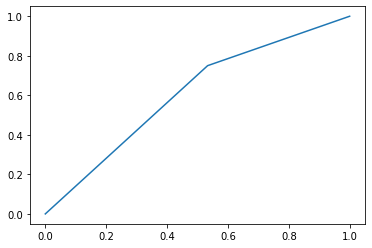

In [44]:
false_positive, true_positive, threshold = roc_curve(y_test, y_pred, pos_label=2)
pyplot.plot(false_positive, true_positive)
print(f'AUC: {roc_auc_score(y_test, y_pred)} ')

# Floresta Randômica - Variaveis preditoras
Agora vamos construir nosso modelo de floresta randômica com auxílio da biblioteca sklearn. Note que estaremos utilizando 100 árvores preditoras (n_estimators= 100) e usaremos todas as variáveis preditoras (max-features=None);

In [45]:
ramdom_forest = RandomForestClassifier(n_estimators= 100, max_features=None )

### validação cruzada
Faremos sua validação cruzada, repetindo o mesmo processo feito para árvores de decisão, separando 10% dos dados para teste. Note que a variável Kfold já foi definida anteriormente; Nossos dados de treinamento e teste se mantém os mesmos então não precisamos redeclará-los.

In [46]:
results = cross_val_score(ramdom_forest, x_train, y_train, cv=kfold, scoring='accuracy')
result2 = results.mean()
result2

0.85

### Treinamento e previsões

In [47]:
ramdom_forest.fit(x_train, y_train)
y_pred = ramdom_forest.predict(x_test)
y_pred

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2])

### Matriz de confusão

In [48]:
confusion_matrix(y_test, y_pred)

array([[ 7,  8],
       [ 5, 55]])

### Curva ROC e AUC

AUC: 0.6916666666666667 


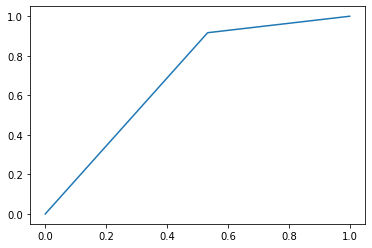

In [49]:
false_positive, true_positive, threshold = roc_curve(y_test, y_pred, pos_label=2)
pyplot.plot(false_positive, true_positive)
print(f'AUC: {roc_auc_score(y_test, y_pred)} ')

# Floresta Randômica - sqrt
Note que estaremos utilizando 100 árvores preditoras (n_estimators= 100) e usaremos a raiz quadrada das variáveis preditoras (max-features='sqrt');

In [50]:
ramdom_forest_sqrt = RandomForestClassifier(n_estimators= 100, max_features='sqrt' )

### Validação Cruzada

In [51]:
results = cross_val_score(ramdom_forest_sqrt, x_train, y_train, cv=kfold, scoring='accuracy')
result3 = results.mean()
result3

0.875

### Treinamento e Previsões

In [52]:
ramdom_forest_sqrt.fit(x_train, y_train)
y_pred = ramdom_forest_sqrt.predict(x_test)
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2])

### Matriz de confusão

In [53]:
confusion_matrix(y_test, y_pred)

array([[ 5, 10],
       [ 3, 57]])

### Curva ROC e AUC

AUC: 0.6416666666666666 


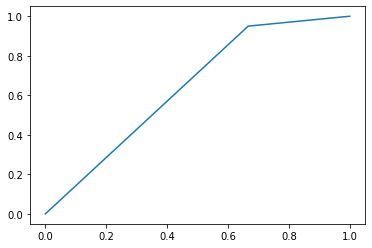

In [54]:
false_positive, true_positive, threshold = roc_curve(y_test, y_pred, pos_label=2)
pyplot.plot(false_positive, true_positive)
print(f'AUC: {roc_auc_score(y_test, y_pred)} ')

# Comparando Modelos
Assim como esperado, todos os modelos acima performaram com certa confiabilidade e com resultados próximos uns dos outros. Uma boa métrica para compararmos o desempenho dos modelos testados é utilizarmos as validações cruzadas feitas anteriormente.

In [55]:
print(f'Acurácia média modelo Arvore de decisão: {result1}')
print(f'Acurácia média modelo Floresta Randomica usando todas variaveis preditoras: {result2}')
print(f'Acurácia média modelo Floresta Randomica usando raiz quadrada variaveis preditoras: {result3}')

Acurácia média modelo Arvore de decisão: 0.775
Acurácia média modelo Floresta Randomica usando todas variaveis preditoras: 0.85
Acurácia média modelo Floresta Randomica usando raiz quadrada variaveis preditoras: 0.875
